# Определение перспективного тарифа для телеком-компании

**Описание проекта**

В распоряжении данные о 500 пользователях компании-оператора сотовой связи. Компания предлагает клиентам два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Проанализировав информацию о пользователях, нужно определить, какой тариф прибыльнее.

## Изучение данных

Импортируем библиотеки и устанавливаем формат вещественных чисел

In [1]:
import pandas as pd                                   
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

pd.set_option('display.float_format', '{:,.2f}'.format)

In [2]:
try:
    calls = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\tariffs\\calls.csv')
    internet = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\tariffs\\internet.csv')
    messages = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\tariffs\\messages.csv')
    tariffs = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\tariffs\\tariffs.csv')
    users = pd.read_csv('C:\\Users\\Дмитрий\\Desktop\\Проекты Я.Практикум\\tariffs\\users.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')
    internet = pd.read_csv('/datasets/internet.csv')
    messages = pd.read_csv('/datasets/messages.csv')
    tariffs = pd.read_csv('/datasets/tariffs.csv')
    users = pd.read_csv('/datasets/users.csv')

Создаем функцию для получения общей информации о таблицах

In [3]:
def info(data):
    data.info()
    display(data.isna().mean())
    display(data)

In [4]:
info(calls)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
...,...,...,...,...
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499


In [5]:
info(internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Unnamed: 0     0.00
id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,"1,052.81",2018-09-07,1000
2,2,1000_2,"1,197.26",2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,"1,246.32",2018-11-26,1499


In [6]:
info(messages)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


id             0.00
message_date   0.00
user_id        0.00
dtype: float64

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [7]:
info(tariffs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
tariff_name             0.00
dtype: float64

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [8]:
info(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


user_id      0.00
age          0.00
churn_date   0.92
city         0.00
first_name   0.00
last_name    0.00
reg_date     0.00
tariff       0.00
dtype: float64

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


**Вывод об исходных данных:**

* Необходимые для работы данные содержатся в 5 таблицах, их нужно объединить.

* В каждой таблице даты имеют строчный формат, нужно перевести в формат даты.

* Пропуски есть только в столбце churn_date (дата прекращения пользования тарифом). Пропуски означают, что пользователь все еще использует услуги связи. Поэтому не заполняем и не удаляем пропуски.

* Необходимо округлить каждое значение длительности разговора до минут и суммарный трафик за месяц до Гб, т.к. плата взимается за минуты и Гб.

* Необходимо определить месяц использования каждой услуги и вынести в отдельный столбец.

* Необходимо сгруппировать таблицы с услугами (минуты, Гб и сообщения) по пользователю и месяцу, чтобы упростить работу с таблицами и исследование.


## Предобработка данных

In [9]:
#переводим дату из строчного формата в формат даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
#добавляем столбец с месяцем для последующей группировки
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
#округляем длительность каждого звонка вверх до минуты
calls['duration'] = np.ceil(calls['duration']).astype('int') 
#группируем таблицу по пользователю и месяцу
calls_monthly = calls.pivot_table(index=['user_id', 'month'], 
                                  values = 'duration',
                                  aggfunc=['count','sum']).reset_index()

#заменяем двухуровневые названия столбцов на обычные
calls_monthly.columns = ['user_id', 'month', 'calls', 'calls_duration']
display(calls_monthly)


,user_id,month,calls,calls_duration
0,1000,5,22,159
1,1000,6,43,172
2,1000,7,47,340
3,1000,8,52,408
4,1000,9,58,466
...,...,...,...,...
3169,1498,10,41,247
3170,1499,9,9,70
3171,1499,10,68,449
3172,1499,11,74,612


In [10]:
#переводим дату в правильный формат и добавляем столбец с месяцем
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
#округляем мб до Гб
internet['gb_used'] = internet['mb_used']/1024
display(internet)

,Unnamed: 0,id,mb_used,session_date,user_id,month,gb_used
0,0,1000_0,112.95,2018-11-25,1000,11,0.11
1,1,1000_1,"1,052.81",2018-09-07,1000,9,1.03
2,2,1000_2,"1,197.26",2018-06-25,1000,6,1.17
3,3,1000_3,550.27,2018-08-22,1000,8,0.54
4,4,1000_4,302.56,2018-09-24,1000,9,0.30
...,...,...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499,10,0.31
149392,149392,1499_153,490.13,2018-12-14,1499,12,0.48
149393,149393,1499_154,0.00,2018-10-27,1499,10,0.00
149394,149394,1499_155,"1,246.32",2018-11-26,1499,11,1.22


In [11]:
#группируем таблицу по пользователю и месяцу
internet_monthly = internet.pivot_table(index=['user_id', 'month'],
                                        values = 'gb_used',
                                        aggfunc='sum').reset_index()

#округляем потраченное за месяц количество Гб вверх до целого
internet_monthly['gb_used'] = np.ceil(internet_monthly['gb_used'])
display(internet_monthly)

,user_id,month,gb_used
0,1000,5,3.00
1,1000,6,23.00
2,1000,7,14.00
3,1000,8,14.00
4,1000,9,15.00
...,...,...,...
3198,1498,10,21.00
3199,1499,9,2.00
3200,1499,10,18.00
3201,1499,11,18.00


In [12]:
#переводим дату в правильный формат и добавляем столбец с месяцем
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
display(messages)

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [13]:
#группируем таблицу по пользователю и месяцу
messages_monthly = messages.pivot_table(index=['user_id', 'month'], values='id', aggfunc='count').reset_index()
display(messages_monthly)

,user_id,month,id
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


In [14]:
#заменяем столбец id на messages (количество сообщений за месяц)
messages_monthly.columns = ['user_id', 'month', 'messages']
display(messages_monthly)

,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57
...,...,...,...
2712,1498,10,42
2713,1499,9,11
2714,1499,10,48
2715,1499,11,59


Объединяем таблицы способом `outer`, чтобы не потерять пользователей, которые использовали не все услуги.

In [15]:
data = calls_monthly.merge(internet_monthly, on=['user_id', 'month'], how='outer')
data = data.merge(messages_monthly,  on=['user_id', 'month'], how='outer')
data = data.merge(users, on='user_id', how='outer')
display(data)

,user_id,month,calls,calls_duration,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.00,22.00,159.00,3.00,22.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.00,43.00,172.00,23.00,60.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.00,47.00,340.00,14.00,75.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.00,52.00,408.00,14.00,81.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.00,58.00,466.00,15.00,57.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,20.00,21.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.00,NaN,NaN,18.00,20.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.00,NaN,NaN,17.00,35.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


In [16]:
#переводим дату в правильный формат
data['reg_date'] = pd.to_datetime(data['reg_date'], format='%Y-%m-%d')

In [17]:
display(data)
data.info()

,user_id,month,calls,calls_duration,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,5.00,22.00,159.00,3.00,22.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,6.00,43.00,172.00,23.00,60.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,7.00,47.00,340.00,14.00,75.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,8.00,52.00,408.00,14.00,81.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,9.00,58.00,466.00,15.00,57.00,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,20.00,21.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3212,1489,11.00,NaN,NaN,18.00,20.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3213,1489,12.00,NaN,NaN,17.00,35.00,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart
3214,1128,NaN,NaN,NaN,NaN,NaN,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         3216 non-null   int64         
 1   month           3214 non-null   float64       
 2   calls           3174 non-null   float64       
 3   calls_duration  3174 non-null   float64       
 4   gb_used         3203 non-null   float64       
 5   messages        2717 non-null   float64       
 6   age             3216 non-null   int64         
 7   churn_date      189 non-null    object        
 8   city            3216 non-null   object        
 9   first_name      3216 non-null   object        
 10  last_name       3216 non-null   object        
 11  reg_date        3216 non-null   datetime64[ns]
 12  tariff          3216 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 351.8+ KB


In [18]:
#переименовываем столбец tariff_name в tariff, чтобы по нему объединить таблицы
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'})
data = data.merge(tariffs, on='tariff', how='left')

#переводим количество Гб и сообщений в целые значения
data['gb_used'] = data['gb_used'].astype('Int64')
data['messages'] = data['messages'].astype('Int64')
display(data)

,user_id,month,calls,calls_duration,gb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5.00,22.00,159.00,3,22,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,6.00,43.00,172.00,23,60,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,7.00,47.00,340.00,14,75,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,8.00,52.00,408.00,14,81,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,9.00,58.00,466.00,15,57,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,NaN,NaN,20,21,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3212,1489,11.00,NaN,NaN,18,20,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3213,1489,12.00,NaN,NaN,17,35,35,NaN,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,50,15360,500,550,200,3,3
3214,1128,NaN,NaN,NaN,<NA>,<NA>,51,2018-12-23,Волжский,Ксения,Агаева,2018-12-15,ultra,1000,30720,3000,1950,150,1,1


In [19]:
data.isna().sum()

user_id                     0
month                       2
calls                      42
calls_duration             42
gb_used                    13
messages                  499
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff                      0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

Вероятно, пропуски в столбцах `calls`, `calls_duration`, `messages`, `gb_used` означают отсутствие сообщений/звонков. Поэтому заполним пропуски нулем.

In [20]:
data[['calls', 'calls_duration', 'messages', 'gb_used']] = data[['calls', 
                                                                 'calls_duration', 
                                                                 'messages', 
                                                                 'gb_used']].fillna(0)

## Расчёты и исследование данных

Рассчитываем выручку с каждого пользователя в месяц

In [21]:
#создаем и применяем функцию для подсчета выручки с каждого пользователя в месяц
def income(data):
    income = data['rub_monthly_fee']
    if data['calls_duration'] > data['minutes_included']:
        income += (data['calls_duration'] - data['minutes_included'])*data['rub_per_minute']
    if data['gb_used'] > (data['mb_per_month_included']/1024):
        income += (data['gb_used']-(data['mb_per_month_included']/1024))*data['rub_per_gb']
    if data['messages'] > data['messages_included']:
        income += (data['messages']-data['messages_included'])*data['rub_per_message']
    return income
data['income'] = data.apply(income, axis=1)
data['income'] = data['income'].astype('int')
display(data)

,user_id,month,calls,calls_duration,gb_used,messages,age,churn_date,city,first_name,...,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,income
0,1000,5.00,22.00,159.00,3,22,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
1,1000,6.00,43.00,172.00,23,60,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
2,1000,7.00,47.00,340.00,14,75,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
3,1000,8.00,52.00,408.00,14,81,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
4,1000,9.00,58.00,466.00,15,57,52,NaN,Краснодар,Рафаил,...,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,10.00,0.00,0.00,20,21,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1550
3212,1489,11.00,0.00,0.00,18,20,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,1150
3213,1489,12.00,0.00,0.00,17,35,35,NaN,Санкт-Петербург,Павел,...,2018-08-15,smart,50,15360,500,550,200,3,3,950
3214,1128,NaN,0.00,0.00,0,0,51,2018-12-23,Волжский,Ксения,...,2018-12-15,ultra,1000,30720,3000,1950,150,1,1,1950


**Изучаем поведение пользователей с разными тарифами**

In [22]:
data_smart = data.query('tariff == "smart"')

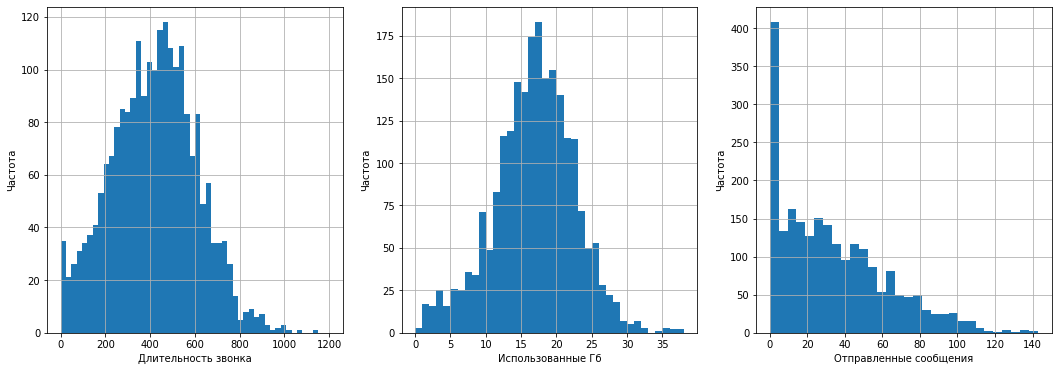

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.hist(data_smart['calls_duration'], bins=50, range=(0,1200))
plt.xlabel('Длительность звонка')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(data_smart['gb_used'], bins=38)
plt.xlabel('Использованные Гб')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(data_smart['messages'], bins=30,range=(0,143))
plt.xlabel('Отправленные сообщения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [24]:
print('variance', np.var(data_smart['calls_duration'], ddof=1))
print(data_smart['calls_duration'].describe())

variance 36281.39383644458
count   2,230.00
mean      417.75
std       190.48
min         0.00
25%       282.00
50%       421.50
75%       545.00
max     1,435.00
Name: calls_duration, dtype: float64


In [25]:
print('variance', np.var(data_smart['gb_used'], ddof=1))
print(data_smart['gb_used'].describe())

variance 33.133453035506285
count   2,230.00
mean       16.32
std         5.76
min         0.00
25%        13.00
50%        17.00
75%        20.00
max        38.00
Name: gb_used, dtype: float64


In [26]:
print('variance', np.var(data_smart['messages'], ddof=1))
print(data_smart['messages'].describe())

variance 796.9552557301129
count   2,230.00
mean       33.37
std        28.23
min         0.00
25%        10.00
50%        28.00
75%        51.00
max       143.00
Name: messages, dtype: float64


**Выводы по тарифу "smart"**:

* Количество потраченных минут варьируется от 0 до 1435. Среднее и медиана равны 419 и 423 минуты, соответственно. Стандартное отклонение и дисперсия равны 189 и 35844. Распределение близко к нормальному, но имеет небольшую скошенность в левую сторону.

* Количество использованных Гб варьируется от 0 до 38. Среднее и медиана равны 16.34 и 17 Гб. Стандартное отклонение и дисперсия равны 5.74 и 32.99, соответственно. Распределение также имеет небольшую скошенность влево.

* Количество сообщений варьируется от 1 до 143. Среднее и медиана равны 39 и 34, соответственно. Стандартное отклонение и дисперсия равны 26.8 и 719.2. Распределение сильно скошено влево.

In [27]:
data_ultra = data.query('tariff == "ultra"')

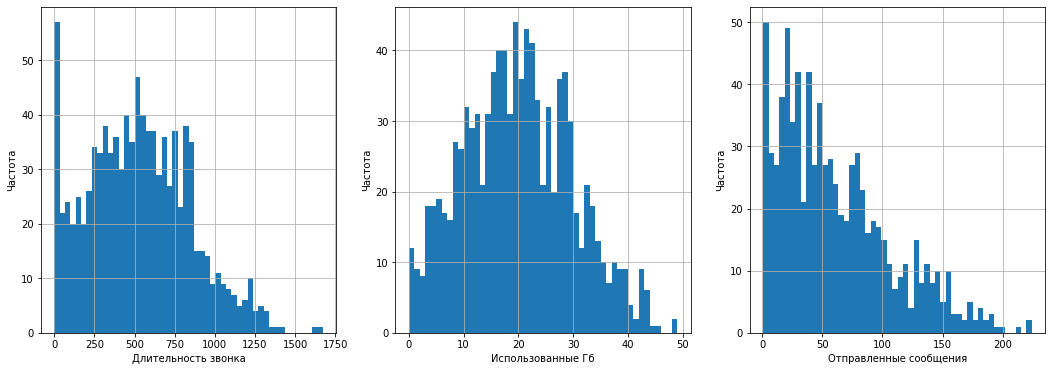

In [28]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.hist(data_ultra['calls_duration'], bins=50, range=(0,1673))
plt.xlabel('Длительность звонка')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1,3,2)
plt.hist(data_ultra['gb_used'], bins=49)
plt.xlabel('Использованные Гб')
plt.ylabel('Частота')
plt.grid(True)

plt.subplot(1,3,3)
plt.hist(data_ultra['messages'], bins=50,range=(1,224))
plt.xlabel('Отправленные сообщения')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

In [29]:
print('variance', np.var(data_ultra['calls_duration'], ddof=1))
print(data_ultra['calls_duration'].describe())

variance 101052.49354928387
count     986.00
mean      526.09
std       317.89
min         0.00
25%       282.50
50%       518.00
75%       751.75
max     1,673.00
Name: calls_duration, dtype: float64


In [30]:
print('variance', np.var(data_ultra['gb_used'], ddof=1))
print(data_ultra['gb_used'].describe())

variance 97.37854429011234
count   986.00
mean     19.47
std       9.87
min       0.00
25%      12.00
50%      19.00
75%      27.00
max      49.00
Name: gb_used, dtype: float64


In [31]:
print('variance', np.var(data_ultra['messages'], ddof=1))
print(data_ultra['messages'].describe())

variance 2285.4174246558414
count   986.00
mean     49.31
std      47.81
min       0.00
25%       6.00
50%      38.00
75%      78.75
max     224.00
Name: messages, dtype: float64


**Выводы по тарифу "ultra"**:

* Количество минут, потраченных в месяц варьируется от 0 до 1673. Среднее и медиана равны 545 и 528, соответственно. Стандартное отклонение и дисперсия равны 307 и 94203. Распределение скошено влево сильнее, чем в тарифе smart.

* Количество использованных Гб варьируется от 0 до 49. Среднее и медиана равны 19.7 и 19 Гб, соответственно. Стандартное отклонение и дисперсия равны 9.7 и 94.8. Распределение имеет небольшую скошенность вправо.

* Количество отправленных сообщений варьируется от 1 до 224. Среднее и медиана равны 61 и 52, соответственно. Стандартное отклонение и дисперсия равны 44.7 и 2000. Распределение сильно скошено вправо.

## Проверка гипотез

### Гипотеза №1. Средняя выручка от пользователей тарифов "смарт" и "ультра" различается.

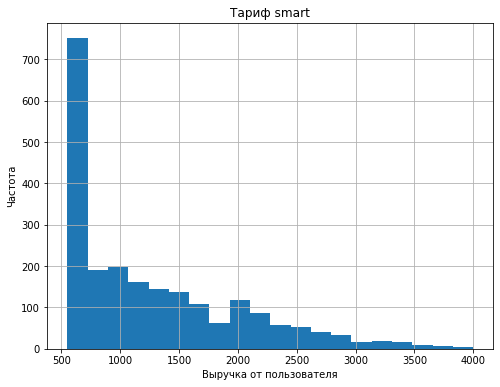

In [32]:
plt.figure(figsize=(8,6))
plt.hist(data_smart['income'], bins=20,range=(550,4000))
plt.xlabel('Выручка от пользователя')
plt.ylabel('Частота')
plt.title('Тариф smart')
plt.grid(True)
plt.show()

In [33]:
print('variance', np.var(data_smart['income'], ddof=1))
print(data_smart['income'].describe())

variance 669730.763894807
count   2,230.00
mean    1,289.64
std       818.37
min       550.00
25%       550.00
50%     1,021.00
75%     1,750.00
max     6,770.00
Name: income, dtype: float64


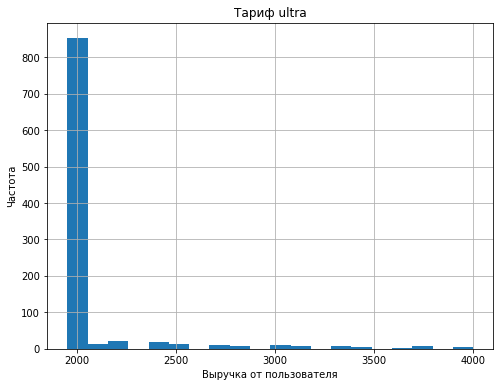

In [40]:
plt.figure(figsize=(8,6))
plt.hist(data_ultra['income'], bins=20,range=(1950,4000))
plt.xlabel('Выручка от пользователя')
plt.ylabel('Частота')
plt.title('Тариф ultra')
plt.grid(True)
plt.show()

In [35]:
print('variance', np.var(data_ultra['income'], ddof=1))
print(data_ultra['income'].describe())

variance 141387.7148093615
count     986.00
mean    2,070.03
std       376.02
min     1,950.00
25%     1,950.00
50%     1,950.00
75%     1,950.00
max     4,800.00
Name: income, dtype: float64


**H0: средние выручки по разным тарифам равны.**

**H1: средние выручки по разным тарифам различаются.**

Если p-value меньше, чем уровень значимости, то H0 отвергаем и принимаем H1.

In [36]:
#alpha = 0.05
#alpha = 0.01
alpha = 0.001
results = st.ttest_ind(data_smart['income'], data_ultra['income'], equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Средние выручки различаются')
else:
    print('Статистически значимых различий между средними выручками не обнаружено')


p-значение:  1.927011394420941e-250
Средние выручки различаются


**Вывод:**

Средние выручки от пользователей с разными тарифами различаются, исходя из результатов t-теста с уровнями значимости 5, 1 и 0.1%. Т.к. размеры выборок и их дисперсии отличались, в параметре equal_var указали значение False.

**Тариф ultra приносит компании больше выручки, чем smart**

### Гипотеза №2. Средняя выручка от пользователей из Москвы отличается от средней выручки от пользователей из других регионов.

**H0: средние выручки в Москве и других городах равны.**

**H1: средние выручки в Москве и других городах различаются.**

Если p-value меньше, чем уровень значимости, то H0 отвергаем и принимаем H1.

In [37]:
data_moscow = data.query('city == "Москва"')
data_others = data.query('city != "Москва"')

In [38]:
alpha = 0.05
#alpha = 0.01
#alpha = 0.001
results = st.ttest_ind(data_moscow['income'], data_others['income'], equal_var = False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Средние выручки различаются')
else:
    print('Статистически значимых различий между средними выручками не обнаружено')

p-значение:  0.5216952110000279
Статистически значимых различий между средними выручками не обнаружено


**Вывод:**

P-value выше уровня значимости, поэтому принимаем, что средняя выручка от пользователей из Москвы и других городов не отличаются.

## Общий вывод

**Предобработку данных провели следующими способами:**

* Перевели даты из строчного формата в формат дат.

* Округлили в большую сторону продолжительность каждого звонка.

* Вынесли в отдельный столбец месяц, в который осуществлялась услуга.

* Перевели мб в Гб и округлили суммарный трафик за месяц в большую сторону.

* Перевели вещественные значения в целые, где это уместно.

* Сгруппировали таблицы с услугами (минуты, Гб, сообщения) по пользователю и месяцу.

* Объединили все таблицы.

**Провели следующие расчеты и анализ данных:**

* С помощью функции посчитали выручку от каждого пользователя и вынесли в отдельный столбец.

* Исследовали активность пользователей каждого из тарифов.

**Проверили следующие гипотезы:**

* Гипотеза №1: "Средняя выручка от пользователей тарифов "смарт" и "ультра" различается". Гипотеза оказалась верна.

* Гипотеза №2: "Средняя выручка от пользователей из Москвы отличается от средней выручки от пользователей из других регионов". Гипотеза оказалась неверной, статистически значимых отличий Москвы от других городов не выявили.

Тариф ultra приносит компании больше выручки, поэтому рекламную компанию целесообразно сфокусировать на нем.
